## Zomato Recommender : Building an intelligent food recommendation systemz

<img src="zomato.jpg" style="height:100px;width:100px;">

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('C:\\Users\\Meghana\\Downloads\\zomato_dataset.csv')
df


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,8.1,39
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,8.1,39
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0,8.1,39
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0,8.1,39
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0,8.1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0,8.1,536
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0,8.1,536
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0,8.1,536
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0,8.1,536


In [27]:
df.shape

(123657, 12)

In [28]:
df.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [4]:
# prints the no of restaurants in a city 
df['City'].value_counts()

 Hyderabad       15613
 Jaipur          14438
 Mumbai          13535
 Chennai         13100
 Bangalore       12040
 Ahmedabad       10178
 Kolkata          8662
 Pune             8067
 Kochi            7759
 Raipur           7700
 Lucknow          6455
 New Delhi        3490
 Goa              2360
 Banaswadi          97
 Ulsoor             66
 Magrath Road       54
 Malleshwaram       43
Name: City, dtype: int64

In [30]:
df['Item Name'].value_counts() ## filtering 

Veg Fried Rice                   322
Paneer Butter Masala             319
Chicken Fried Rice               278
Jeera Rice                       231
Chicken Biryani                  226
                                ... 
Chicken Chinese Choupsey           1
Chicken Burn Chilli Noodles        1
Chicken Chilli Oyster Noodles      1
Prawn American Choupsey            1
ChickenTuktuk                      1
Name: Item Name, Length: 55693, dtype: int64

In [5]:
# to get the particular item related restaraunts 
df[df['Item Name']=='Chicken Biryani']

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
178,Crystal Restaurant & Bar,4.2,3.9,697,0,Biryani,Nallakunta,Hyderabad,Chicken Biryani,BESTSELLER,609,230.0
352,Crystal Restaurant & Bar,4.2,3.9,697,0,Biryani,Nallakunta,Hyderabad,Chicken Biryani,BESTSELLER,609,230.0
1007,Papadams Blue,4.0,3.9,625,0,Desserts,Kothapet,Hyderabad,Chicken Biryani,BESTSELLER,60,295.0
1210,Papadams Blue,4.0,3.9,625,0,Desserts,Kothapet,Hyderabad,Chicken Biryani,BESTSELLER,60,295.0
3515,Yashwanth Pizza Den,NaN,4.0,0,15,Beverages,RTC X roads,Hyderabad,Chicken Biryani,NaN,0,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121502,Chapter One,4.3,3.8,20,228,Pizza,Shankar Nagar,Raipur,Chicken Biryani,BESTSELLER,21,189.0
121915,Tandoor -3 Family Dhaba,3.2,4.0,28,0,Pizza,Mahaveer Nagar,Raipur,Chicken Biryani,BESTSELLER,28,160.0
122048,Tandoor -3 Family Dhaba,3.2,4.0,28,0,Pizza,Mahaveer Nagar,Raipur,Chicken Biryani,BESTSELLER,28,160.0
122096,Chef's Kitchen,4.0,3.9,413,0,Pizza,Civil Lines,Raipur,Chicken Biryani,MUST TRY,86,250.0


In [31]:
df.describe()


,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
count,91421.000000,122377.000000,123657.000000,123657.000000,123657.000000,123657.000000
mean,3.822264,3.963184,152.729858,115.763725,24.666772,241.378399
std,0.408693,0.245900,232.214061,243.970828,125.236009,192.830713
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.600000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.900000,4.000000,30.000000,0.000000,0.000000,208.570000
75%,4.100000,4.100000,217.000000,23.000000,15.000000,299.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000


In [32]:
df['Restaurant Name'].unique()

array(['Doner King', 'Taco Bell', 'BrownBear', 'Crystal Restaurant & Bar',
       'Siddique Kabab Centre', 'Shah Ghouse Special Shawarma',
       'Taj Mahal - Taj Mahal Hotel', 'Burger King', 'Papadams Blue',
       'Ovenstory Pizza', 'Italian Pizzeria', 'Al Rabea Mandi House',
       'Govind Dosa', 'Universal Al Mataam Mandi Kebab & Biryani',
       'The Thickshake Factory', 'Platform 65', 'Food Track',
       'The Burger Club', 'Acme Candy Food', 'MS Bakery & Sweets',
       'New Grand Restaurant & Bakery', 'Al - Hamoor Arabian Restaurant',
       "McDonald's", 'Capital Multi Cuisine Restaurant',
       'Mayur Pan House', 'Yashwanth Pizza Den', 'Hotel Nayaab',
       'Red Bucket Biryani', 'Hotel Shadab', 'Mughal Restaurant',
       'UBQ by Barbeque Nation', 'Santosh Dhaba', 'Tipsy Topsy Bakery',
       'Shah Ghouse Hotel & Restaurant', "La Pino'z Pizza", 'Istanbul',
       'Iqbal Cafe', 'Barbeque Nation',
       'Kwality Wall\x92s Frozen Dessert and Ice Cream Shop',
       'Akbar Fas

In [33]:
df.head(10)

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
5,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Pizza [8 inches],BESTSELLER,48,199.0
6,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Zinger Tortilla Wrap,CHEF'S SPECIAL,27,165.0
7,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Popcorn [20 Pieces],BESTSELLER,59,165.0
8,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Sandwich,NaN,29,115.0
9,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Bread Samoli Shawarma,NaN,31,129.0


In [34]:
df.tail()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0
123656,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Gosht Gilawat Chop,BESTSELLER,0,595.0


In [35]:
# To print the dataframe number of rows?
print(len(df.values))

123657


In [36]:
# To get the dataframe index names..
print(df.index)


RangeIndex(start=0, stop=123657, step=1)


In [37]:
df.rename(columns={'Best Seller':'Best-Sell'},inplace=True)
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best-Sell,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0


In [38]:
# to sort according to the rating high to low 
df1=df.sort_values('Dining Rating',ascending=False) # filtering 
df1

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best-Sell,Votes,Prices
106323,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Tender Coconut Ice Cream,BESTSELLER,287,79.24
106312,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Sitaphal Ice Cream,MUST TRY,102,79.24
106314,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,"Anjeer (Medium Fat Ice Cream, No Added Sugar)",NaN,0,83.91
106333,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Kesar Pista Ice Cream,BESTSELLER,53,79.24
106332,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Malai Ice Cream,BESTSELLER,44,79.24
...,...,...,...,...,...,...,...,...,...,...,...,...
123319,The Breakfast Cafe,NaN,3.6,1,682,Pizza,Civil Lines,Raipur,Poha + Masala Dosa,NaN,0,214.00
123320,The Breakfast Cafe,NaN,3.6,1,682,Pizza,Civil Lines,Raipur,Sabudana Khichdi+veg Grilled Sandwich,NaN,0,245.00
123321,The Breakfast Cafe,NaN,3.6,1,682,Pizza,Civil Lines,Raipur,Sabudana Wada+idli Fry,NaN,0,225.00
123322,The Breakfast Cafe,NaN,3.6,1,682,Pizza,Civil Lines,Raipur,Sattu Paratha With Aloo Sabji+lassi,NaN,0,275.00


In [6]:
df1=df.sort_values('Delivery Rating',ascending=False) # filtering 
df1

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
62463,Dream Cutlets,NaN,4.6,0,449,Fast Food,Fort Kochi,Kochi,Sausage Cheese Wrap [5 Pieces],BESTSELLER,10,120.0
62479,Dream Cutlets,NaN,4.6,0,449,Fast Food,Fort Kochi,Kochi,Fish Cutlet [1 Piece],NaN,18,20.0
62481,Dream Cutlets,NaN,4.6,0,449,Fast Food,Fort Kochi,Kochi,Chicken Russian Cutlet,CHEF'S SPECIAL,42,28.0
62482,Dream Cutlets,NaN,4.6,0,449,Fast Food,Fort Kochi,Kochi,2 Mix Veg Cheese with 2 Mix Veg Paneer,NaN,0,100.0
62483,Dream Cutlets,NaN,4.6,0,449,Fast Food,Fort Kochi,Kochi,5 Meat + 2 Fish Cutlets,BESTSELLER,27,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122700,Burger Singh - Big Punjabi Burgers,NaN,NaN,0,0,Pizza,Tatibandh,Raipur,Chocolava Cake,NaN,5,99.0
122701,Burger Singh - Big Punjabi Burgers,NaN,NaN,0,0,Pizza,Tatibandh,Raipur,Hot Bihari Dip,NaN,0,25.0
122702,Burger Singh - Big Punjabi Burgers,NaN,NaN,0,0,Pizza,Tatibandh,Raipur,Tandoori Dip,NaN,0,25.0
122703,Burger Singh - Big Punjabi Burgers,NaN,NaN,0,0,Pizza,Tatibandh,Raipur,Cheese Dip,NaN,0,25.0


In [39]:
# to get top 5 rated 
df1.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best-Sell,Votes,Prices
106323,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Tender Coconut Ice Cream,BESTSELLER,287,79.24
106312,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Sitaphal Ice Cream,MUST TRY,102,79.24
106314,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,"Anjeer (Medium Fat Ice Cream, No Added Sugar)",NaN,0,83.91
106333,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Kesar Pista Ice Cream,BESTSELLER,53,79.24
106332,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Malai Ice Cream,BESTSELLER,44,79.24


In [12]:
df.rename(columns={'City':'CITY'},inplace=True)
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,CITY,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0


In [15]:
df1['Place Name'].value_counts()

C Scheme           3775
Navrangpura        1936
Chembur            1826
Charminar          1751
Abids              1668
                   ... 
Shobha Bazar         16
Das Naagar           15
Elamakkara           13
Tripunithura          9
Deccan Gymkhana       4
Name: Place Name, Length: 324, dtype: int64

In [22]:
df1[['Restaurant Name','City']]

,Restaurant Name,City
62463,Dream Cutlets,Kochi
62479,Dream Cutlets,Kochi
62481,Dream Cutlets,Kochi
62482,Dream Cutlets,Kochi
62483,Dream Cutlets,Kochi
...,...,...
122700,Burger Singh - Big Punjabi Burgers,Raipur
122701,Burger Singh - Big Punjabi Burgers,Raipur
122702,Burger Singh - Big Punjabi Burgers,Raipur
122703,Burger Singh - Big Punjabi Burgers,Raipur


In [11]:
# To print the student name start with 'a' from dataset?
df1[df1['Restaurant Name'].str.startswith('B')]

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
113326,Balaram Mullick & Radharaman Mullick Sweets,3.3,4.5,6,0,Pizza,Theatre Road,Kolkata,Mango Souffle,BESTSELLER,0,450.0
113325,Balaram Mullick & Radharaman Mullick Sweets,3.3,4.5,6,0,Pizza,Theatre Road,Kolkata,Mango Souffle Cup [4 Pieces],NaN,0,180.0
113324,Balaram Mullick & Radharaman Mullick Sweets,3.3,4.5,6,0,Pizza,Theatre Road,Kolkata,Rasmundi Rasmalai,NaN,11,150.0
113323,Balaram Mullick & Radharaman Mullick Sweets,3.3,4.5,6,0,Pizza,Theatre Road,Kolkata,Pantua [4 Pieces],NaN,7,80.0
113321,Balaram Mullick & Radharaman Mullick Sweets,3.3,4.5,6,0,Pizza,Theatre Road,Kolkata,Rossogolla [5 Pieces],BESTSELLER,19,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122700,Burger Singh - Big Punjabi Burgers,NaN,NaN,0,0,Pizza,Tatibandh,Raipur,Chocolava Cake,NaN,5,99.0
122701,Burger Singh - Big Punjabi Burgers,NaN,NaN,0,0,Pizza,Tatibandh,Raipur,Hot Bihari Dip,NaN,0,25.0
122702,Burger Singh - Big Punjabi Burgers,NaN,NaN,0,0,Pizza,Tatibandh,Raipur,Tandoori Dip,NaN,0,25.0
122703,Burger Singh - Big Punjabi Burgers,NaN,NaN,0,0,Pizza,Tatibandh,Raipur,Cheese Dip,NaN,0,25.0


In [23]:
df1[df1['Prices'] == 180] # data of costumers budget related restrauants


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
113325,Balaram Mullick & Radharaman Mullick Sweets,3.3,4.5,6,0,Pizza,Theatre Road,Kolkata,Mango Souffle Cup [4 Pieces],NaN,0,180.0
113277,Balaram Mullick & Radharaman Mullick Sweets,3.3,4.5,6,0,Pizza,Theatre Road,Kolkata,Mango Souffle Cup [4 Pieces],NaN,0,180.0
5316,Kwality Walls Frozen Dessert and Ice Cream Shop,NaN,4.5,0,346,Desserts,Kacheguda,Hyderabad,"Butterscotch [700 ml, 1 Tub]",NaN,8,180.0
61385,Let's Eat Bakers,NaN,4.4,0,0,Sandwich,Panampilly Nagar,Kochi,Jeera Salted Cookies [200 grams],NaN,0,180.0
61376,Let's Eat Bakers,NaN,4.4,0,0,Sandwich,Panampilly Nagar,Kochi,Pista Stick Cookies [200 grams],NaN,0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65346,Goa'rmet By The Tiffin Factory,NaN,NaN,0,14,Desserts,Panaji,Goa,Mushroom Xacuti + 4 Chapatis,NaN,0,180.0
65350,Goa'rmet By The Tiffin Factory,NaN,NaN,0,14,Desserts,Panaji,Goa,Mushroom Xacuti Meal Box,NaN,0,180.0
65351,Goa'rmet By The Tiffin Factory,NaN,NaN,0,14,Desserts,Panaji,Goa,Veg Cafreal Meal Box,NaN,0,180.0
65420,Goa'rmet By The Tiffin Factory,NaN,NaN,0,14,Desserts,Panaji,Goa,Vegetable Fried Rice,NaN,0,180.0


## DAta cleaning 

In [40]:
df.isnull()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best-Sell,Votes,Prices
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,False,False,False,False,False,False,False,False,False,True,False,False
123653,False,False,False,False,False,False,False,False,False,True,False,False
123654,False,False,False,False,False,False,False,False,False,True,False,False
123655,False,False,False,False,False,False,False,False,False,True,False,False


In [43]:
# To print the only null values records
df[df.isnull().any(axis=1)]

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best-Sell,Votes,Prices
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
8,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Sandwich,NaN,29,115.0
9,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Bread Samoli Shawarma,NaN,31,129.0
10,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Fish Platter [Boneless Indian Basa],NaN,9,295.0
14,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,French Fries + Coke [220 ml],NaN,0,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123651,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chilli Kebab,NaN,0,525.0
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0


In [44]:
df.isnull().sum()

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best-Sell          95715
Votes                  0
Prices                 0
dtype: int64

In [45]:
# To fill the specific column name null vallues
df['Dining Rating'].fillna(0,inplace=True)
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best-Sell,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0


In [46]:
df['Delivery Rating'].fillna(0,inplace=True)
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best-Sell,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0


In [47]:
df['Best-Sell'].fillna('not specific',inplace=True)
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best-Sell,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,not specific,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,not specific,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,not specific,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,not specific,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,not specific,0,525.0


In [48]:
df.isnull().sum() # data cleaning finished 

Restaurant Name    0
Dining Rating      0
Delivery Rating    0
Dining Votes       0
Delivery Votes     0
Cuisine            0
Place Name         0
City               0
Item Name          0
Best-Sell          0
Votes              0
Prices             0
dtype: int64

In [7]:
df


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0


In [13]:
gp = df.groupby('Restaurant Name')
gp

In [14]:
gp.ngroups

826

In [15]:
gp.get_group('Doner King')

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
5,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Pizza [8 inches],BESTSELLER,48,199.0
6,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Zinger Tortilla Wrap,CHEF'S SPECIAL,27,165.0
7,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Popcorn [20 Pieces],BESTSELLER,59,165.0
8,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Sandwich,NaN,29,115.0
9,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Bread Samoli Shawarma,NaN,31,129.0


In [16]:
gp = df.groupby('Place Name') # grouping with the place name so the costumers can choose the avalialble restraunts 
gp

In [17]:
gp.ngroups

324

In [18]:
gp.get_group('Malakpet')

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15575,The Wrap House,4.0,4.1,60,0,Fast Food,Malakpet,Hyderabad,Grill Chicken Sandwich,NaN,38,135.0
15576,The Wrap House,4.0,4.1,60,0,Fast Food,Malakpet,Hyderabad,Three Cheese Sandwich,NaN,0,165.0
15577,The Wrap House,4.0,4.1,60,0,Fast Food,Malakpet,Hyderabad,Totrilla Beef Sandwich,NaN,0,165.0
15578,The Wrap House,4.0,4.1,60,0,Fast Food,Malakpet,Hyderabad,Grilled Chicken Full,NaN,0,465.0


In [21]:
df[(df['Item Name']=='Grill Chicken Sandwich') & (df['Place Name']=='Malakpet')]


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
5845,Sip & Bite,3.5,3.8,14,175,Beverages,Malakpet,Hyderabad,Grill Chicken Sandwich,BESTSELLER,0,150.0
15575,The Wrap House,4.0,4.1,60,0,Fast Food,Malakpet,Hyderabad,Grill Chicken Sandwich,NaN,38,135.0


In [24]:
df['Item Name'].unique() ## unique items.

array(['Platter Kebab Combo', 'Chicken Rumali Shawarma',
       'Chicken Tandoori Salad', ..., 'Veg Mexican Crocquetts',
       'Chicken Salad Pepper Corn', 'ChickenTuktuk'], dtype=object)

In [25]:
print(len(df['Item Name'].unique())) 

55693


In [26]:
# To add the two subject marks..
df['Total Rating']=df['Dining Rating']+df['Delivery Rating']
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,8.1
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,8.1
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0,8.1
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0,8.1
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0,8.1
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0,8.1
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0,8.1
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0,8.1


In [27]:
df['Total Votes']=df['Dining Votes']+df['Delivery Votes']
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,8.1,39
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,8.1,39
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0,8.1,39
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0,8.1,39
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0,8.1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0,8.1,536
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0,8.1,536
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0,8.1,536
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0,8.1,536


In [28]:
df.to_csv('C:\\Users\\Meghana\\Downloads\\zomato_dataset.csv',index=False)
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,8.1,39
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,8.1,39
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0,8.1,39
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0,8.1,39
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0,8.1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0,8.1,536
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0,8.1,536
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0,8.1,536
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0,8.1,536


In [29]:
df.sort_values('Restaurant Name') # alphabetical order of rest names 

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
60216,12 To 12 BBQ,4.0,4.0,104,0,Biryani,Panampilly Nagar,Kochi,Tandoori Chicken,BESTSELLER,35,280.0,8.0,104
60157,12 To 12 BBQ,4.0,4.0,104,0,Biryani,Panampilly Nagar,Kochi,Arabian Chicken Biryani,MUST TRY,10,315.0,8.0,104
60156,12 To 12 BBQ,4.0,4.0,104,0,Biryani,Panampilly Nagar,Kochi,Cucumber Salad,NaN,17,100.0,8.0,104
60155,12 To 12 BBQ,4.0,4.0,104,0,Biryani,Panampilly Nagar,Kochi,Chilli Paneer Dry,NaN,0,200.0,8.0,104
60154,12 To 12 BBQ,4.0,4.0,104,0,Biryani,Panampilly Nagar,Kochi,Chicken Sweet Corn Soup,NaN,0,135.0,8.0,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6309,Zomoz - The Momo Company,NaN,4.3,0,726,Fast Food,Abids,Hyderabad,Chocolate Bao (1 pc),NaN,0,60.0,NaN,726
6308,Zomoz - The Momo Company,NaN,4.3,0,726,Fast Food,Abids,Hyderabad,Creamy Veg Baos (4 pcs),NaN,0,190.0,NaN,726
6307,Zomoz - The Momo Company,NaN,4.3,0,726,Fast Food,Abids,Hyderabad,Creamy Chicken Baos (4 pcs),BESTSELLER,9,210.0,NaN,726
6314,Zomoz - The Momo Company,NaN,4.3,0,726,Fast Food,Abids,Hyderabad,Veg Steamed Momos + Any Drink + Fries,NaN,0,285.0,NaN,726


In [30]:
df.sort_values('Total Rating',ascending=False) # sort  from top rated to low rated

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
106337,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Make your Own Combo,NaN,5,773.73,9.3,0
106311,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Anjeer Ice Cream,MUST TRY,62,79.24,9.3,0
106318,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Musk Mango (Medium Fat) Ice Cream,NaN,0,79.24,9.3,0
106317,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Lychee Ice Cream,NaN,10,79.24,9.3,0
106316,Natural Ice Cream,4.8,4.5,0,0,Beverages,Connaught Place,New Delhi,Mango (Medium Fat) Ice Cream,BESTSELLER,171,79.24,9.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123319,The Breakfast Cafe,NaN,3.6,1,682,Pizza,Civil Lines,Raipur,Poha + Masala Dosa,NaN,0,214.00,NaN,683
123320,The Breakfast Cafe,NaN,3.6,1,682,Pizza,Civil Lines,Raipur,Sabudana Khichdi+veg Grilled Sandwich,NaN,0,245.00,NaN,683
123321,The Breakfast Cafe,NaN,3.6,1,682,Pizza,Civil Lines,Raipur,Sabudana Wada+idli Fry,NaN,0,225.00,NaN,683
123322,The Breakfast Cafe,NaN,3.6,1,682,Pizza,Civil Lines,Raipur,Sattu Paratha With Aloo Sabji+lassi,NaN,0,275.00,NaN,683


In [34]:
# To sort the mutliple columns
df2=df.sort_values(['Dining Votes','Dining Rating'],ascending=False)

In [35]:
# top res both din votes ,rating 
df2.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
1610,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Govind Dosa,MUST TRY,205,75.0,7.9,997
1611,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Pizza Dosa,MUST TRY,54,135.0,7.9,997
1612,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Plain idly,NaN,373,45.0,7.9,997
1613,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Butter Dosa,BESTSELLER,119,75.0,7.9,997
1614,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Onion Dosa,BESTSELLER,56,60.0,7.9,997


In [36]:
df2.loc[(df2["Dining Rating"]>4.0) & (df2["Dining Votes"]>50)]

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
1610,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Govind Dosa,MUST TRY,205,75.0,7.9,997
1611,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Pizza Dosa,MUST TRY,54,135.0,7.9,997
1612,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Plain idly,NaN,373,45.0,7.9,997
1613,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Butter Dosa,BESTSELLER,119,75.0,7.9,997
1614,Govind Dosa,4.4,3.5,997,0,South Indian,Charminar,Hyderabad,Onion Dosa,BESTSELLER,56,60.0,7.9,997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34326,BurgerMan,4.4,4.3,56,921,Beverages,Egmore,Chennai,Choco Brownie Milkshake [500 Ml],NaN,0,231.0,8.7,977
34327,BurgerMan,4.4,4.3,56,921,Beverages,Egmore,Chennai,Coffee Popcorn Milkshake [500 Ml],NaN,0,231.0,8.7,977
34328,BurgerMan,4.4,4.3,56,921,Beverages,Egmore,Chennai,Nutty Caramel Milkshake [500 Ml],NaN,0,231.0,8.7,977
34329,BurgerMan,4.4,4.3,56,921,Beverages,Egmore,Chennai,Strawberry Cream Milkshake [500 Ml],NaN,0,231.0,8.7,977


In [37]:
df.max()

C:\Users\Meghana\AppData\Local\Temp\ipykernel_16368\1151452817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


Restaurant Name                             Zomoz - The Momo Company
Dining Rating                                                    4.8
Delivery Rating                                                  4.6
Dining Votes                                                     997
Delivery Votes                                                   983
Cuisine                                                        Wraps
Place Name                                                Yousufguda
City                                                          Ulsoor
Item Name          special Chicken BBQ cheese Shawarma and soft b...
Votes                                                           9750
Prices                                                       12024.0
Total Rating                                                     9.3
Total Votes                                                     1393
dtype: object

In [38]:
df['Delivery Rating'].max()

4.6

In [40]:
df2[df2['Restaurant Name'].str.startswith('Z')]


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
11120,Zaffran Mataam Alarabi,4.1,4.1,482,911,Desserts,Falaknuma,Hyderabad,Chicken Mandi [1 Piece],BESTSELLER,158,360.00,8.2,1393
11121,Zaffran Mataam Alarabi,4.1,4.1,482,911,Desserts,Falaknuma,Hyderabad,"Mutton Mandi [Half, 1 Piece]",BESTSELLER,30,400.00,8.2,1393
11122,Zaffran Mataam Alarabi,4.1,4.1,482,911,Desserts,Falaknuma,Hyderabad,Chicken Mandi [2 pieces],BESTSELLER,39,680.00,8.2,1393
11123,Zaffran Mataam Alarabi,4.1,4.1,482,911,Desserts,Falaknuma,Hyderabad,Chicken Kapsa [1 Piece],NaN,0,390.00,8.2,1393
11124,Zaffran Mataam Alarabi,4.1,4.1,482,911,Desserts,Falaknuma,Hyderabad,Chicken Grilled Mandi [Half Bird],NaN,10,750.00,8.2,1393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,Zomoz - The Momo Company,NaN,4.3,0,726,Fast Food,Abids,Hyderabad,7 Up Can - 300 Ml,NaN,0,57.14,NaN,726
6362,Zomoz - The Momo Company,NaN,4.3,0,726,Fast Food,Abids,Hyderabad,Mirinda Can - 300 Ml,NaN,0,57.14,NaN,726
6363,Zomoz - The Momo Company,NaN,4.3,0,726,Fast Food,Abids,Hyderabad,Pepsi Can - 300 Ml,NaN,0,57.14,NaN,726
6364,Zomoz - The Momo Company,NaN,4.3,0,726,Fast Food,Abids,Hyderabad,Zomoz Water Bottle - 500ml,NaN,0,28.57,NaN,726


In [41]:
# top voted restarUNT 
df3 = df2.sort_values('Total Votes',ascending=False)
df3.head(1)

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
11142,Zaffran Mataam Alarabi,4.1,4.1,482,911,Desserts,Falaknuma,Hyderabad,Rice,NaN,0,210.0,8.2,1393


In [42]:
df.min()

C:\Users\Meghana\AppData\Local\Temp\ipykernel_16368\3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


Restaurant Name                                         12 To 12 BBQ
Dining Rating                                                    2.5
Delivery Rating                                                  2.5
Dining Votes                                                       0
Delivery Votes                                                     0
Cuisine                                                     American
Place Name                                      12th Square Building
City                                                       Ahmedabad
Item Name          (2) Italian Non Veg Pizza + (2) Hotlink Pepper...
Votes                                                              0
Prices                                                          0.95
Total Rating                                                     6.0
Total Votes                                                        0
dtype: object

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='Dining Rating', ylabel='Density'>

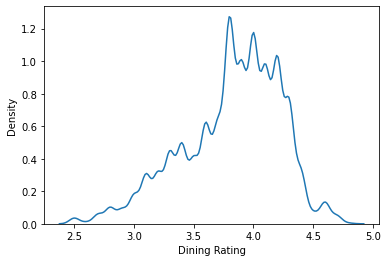

In [58]:
sns.kdeplot(df2["Dining Rating"])  # Kernel density plot to display how raw data is distributed


<AxesSubplot:xlabel='Delivery Rating', ylabel='Density'>

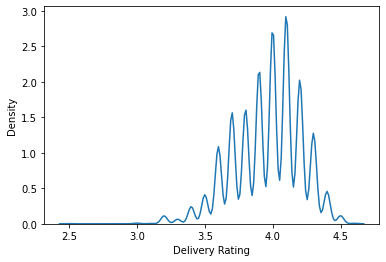

In [56]:
sns.kdeplot(df2["Delivery Rating"])

<AxesSubplot:xlabel='Dining Votes', ylabel='Density'>

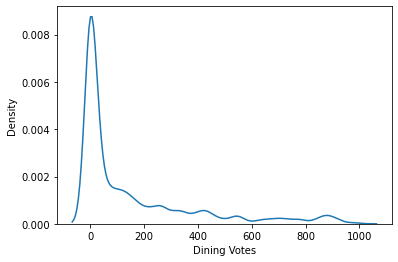

In [54]:
sns.kdeplot(df2["Dining Votes"])

<AxesSubplot:xlabel='Delivery Votes', ylabel='Density'>

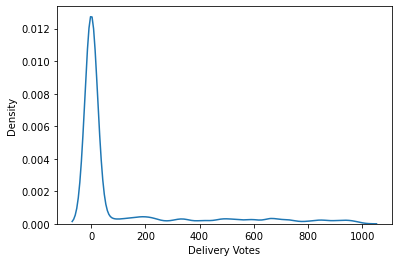

In [57]:
sns.kdeplot(df2["Delivery Votes"])

<AxesSubplot:xlabel='Dining Rating', ylabel='Density'>

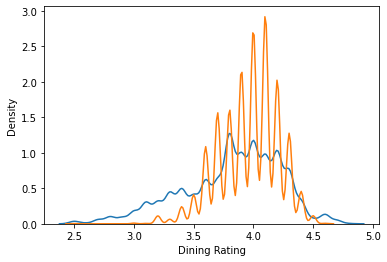

In [59]:
sns.kdeplot(df2["Dining Rating"])
sns.kdeplot(df2["Delivery Rating"])

<AxesSubplot:xlabel='Dining Votes', ylabel='Density'>

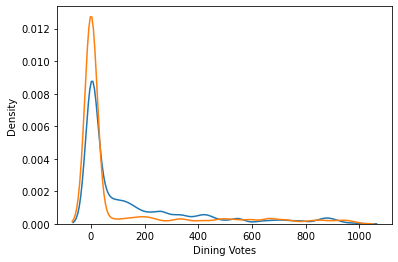

In [60]:
sns.kdeplot(df2["Dining Votes"])
sns.kdeplot(df2["Delivery Votes"])

In [3]:
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,8.1,39
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,8.1,39
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0,8.1,39
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0,8.1,39
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0,8.1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0,8.1,536
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0,8.1,536
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0,8.1,536
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0,8.1,536


In [7]:
df4=df[['Dining Rating','Delivery Rating','Dining Votes','Delivery Votes','Prices','Total Rating','Total Votes']]
df4

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Prices,Total Rating,Total Votes
0,3.9,4.2,39,0,249.0,8.1,39
1,3.9,4.2,39,0,129.0,8.1,39
2,3.9,4.2,39,0,189.0,8.1,39
3,3.9,4.2,39,0,189.0,8.1,39
4,3.9,4.2,39,0,205.0,8.1,39
...,...,...,...,...,...,...,...
123652,3.9,4.2,13,523,525.0,8.1,536
123653,3.9,4.2,13,523,525.0,8.1,536
123654,3.9,4.2,13,523,525.0,8.1,536
123655,3.9,4.2,13,523,525.0,8.1,536


In [8]:
from sklearn.preprocessing import scale

In [10]:
scl=scale(df4)    # entire data of advertising dataset is converted into standard format
scl

array([[ 0.19020728,  0.96305947, -0.48976499, ...,  0.03952499,
         0.57791919, -0.78376106],
       [ 0.19020728,  0.96305947, -0.48976499, ..., -0.58278503,
         0.57791919, -0.78376106],
       [ 0.19020728,  0.96305947, -0.48976499, ..., -0.27163002,
         0.57791919, -0.78376106],
       ...,
       [ 0.19020728,  0.96305947, -0.6017311 , ...,  1.47083804,
         0.57791919,  0.91358159],
       [ 0.19020728,  0.96305947, -0.6017311 , ...,  1.47083804,
         0.57791919,  0.91358159],
       [ 0.19020728,  0.96305947, -0.6017311 , ...,  1.83385222,
         0.57791919,  0.91358159]])

In [16]:
scl_data=pd.DataFrame(scl,columns=df4.columns)
scl_data

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Prices,Total Rating,Total Votes
0,0.190207,0.963059,-0.489765,-0.474500,0.039525,0.577919,-0.783761
1,0.190207,0.963059,-0.489765,-0.474500,-0.582785,0.577919,-0.783761
2,0.190207,0.963059,-0.489765,-0.474500,-0.271630,0.577919,-0.783761
3,0.190207,0.963059,-0.489765,-0.474500,-0.271630,0.577919,-0.783761
4,0.190207,0.963059,-0.489765,-0.474500,-0.188655,0.577919,-0.783761
...,...,...,...,...,...,...,...
123652,0.190207,0.963059,-0.601731,1.669207,1.470838,0.577919,0.913582
123653,0.190207,0.963059,-0.601731,1.669207,1.470838,0.577919,0.913582
123654,0.190207,0.963059,-0.601731,1.669207,1.470838,0.577919,0.913582
123655,0.190207,0.963059,-0.601731,1.669207,1.470838,0.577919,0.913582


In [19]:
df4.mean()

Dining Rating        3.822264
Delivery Rating      3.963184
Dining Votes       152.729858
Delivery Votes     115.763725
Prices             241.378399
Total Rating         7.793426
Total Votes        268.493583
dtype: float64

In [20]:
scl_data.mean()

Dining Rating      6.754796e-15
Delivery Rating    4.357876e-15
Dining Votes      -2.111324e-15
Delivery Votes    -2.265319e-14
Prices            -5.477039e-15
Total Rating       3.088214e-15
Total Votes       -1.437034e-14
dtype: float64

In [22]:
df4.std()

Dining Rating        0.408693
Delivery Rating      0.245900
Dining Votes       232.214061
Delivery Votes     243.970828
Prices             192.830713
Total Rating         0.530482
Total Votes        292.811830
dtype: float64

In [23]:
scl_data.std()

Dining Rating      1.000005
Delivery Rating    1.000004
Dining Votes       1.000004
Delivery Votes     1.000004
Prices             1.000004
Total Rating       1.000005
Total Votes        1.000004
dtype: float64

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
zr=pd.read_csv('C:\\Users\\Meghana\\Downloads\\zomato_dataset.csv')


In [4]:
zr.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Total Rating,Total Votes
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,8.1,39
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,8.1,39
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0,8.1,39
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0,8.1,39
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0,8.1,39


In [5]:
zr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
 12  Total Rating     91360 non-null   float64
 13  Total Votes      123657 non-null  int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 13.2+ MB


## BARplot 

In [ ]:
res=sns.barplot(zr['Dining Rating'],zr['Delivery Rating'])
plt.show()

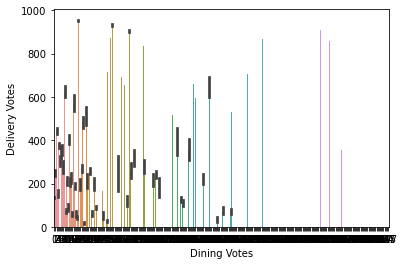

In [11]:
res = sns.barplot(x='Dining Votes',y='Delivery Votes',data=zr)
plt.show()


In [ ]:
sns.countplot(x='Total Votes',hue='Prices',data=zr,palette='Set1')

In [ ]:
sns.distplot(zr.Total Votes,bins=10,color='g')

LinAlgError: singular matrix

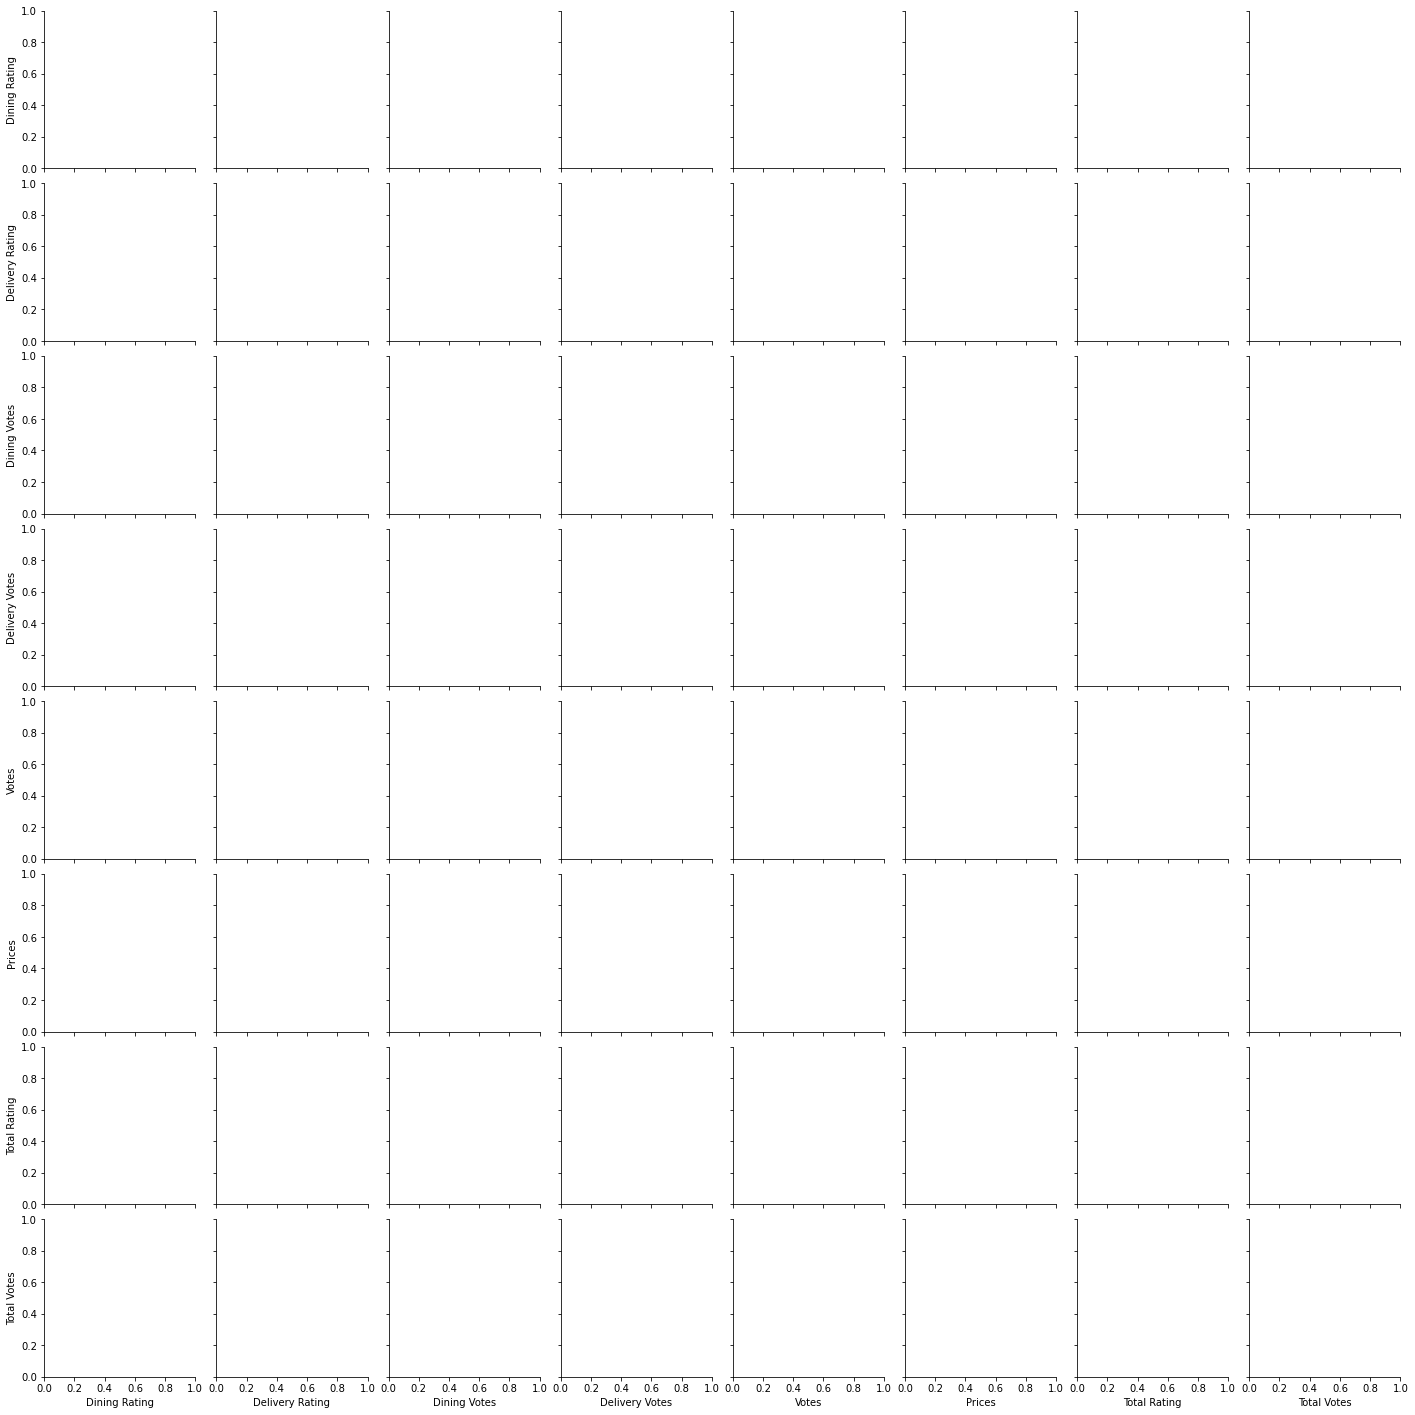

In [6]:
sns.pairplot(zr,hue="Restaurant Name",palette='Set1')

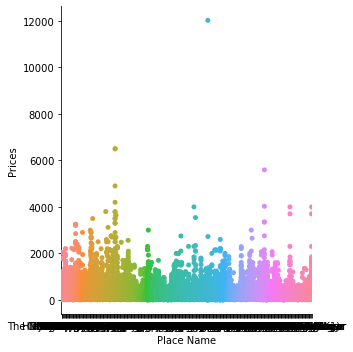

In [10]:
sns.catplot(x="Place Name",y='Prices',data=zr)

C:\Users\Meghana\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 146 (\x92) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Meghana\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()


C:\Users\Meghana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


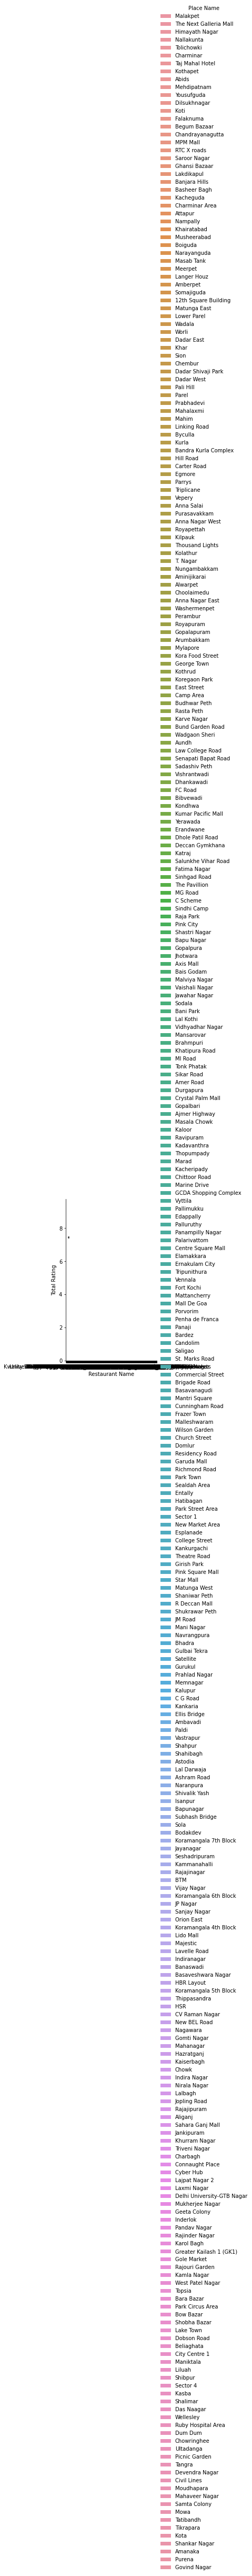

In [13]:
sns.catplot(x="Restaurant Name",y='Total Rating',data=zr,hue='Place Name',kind="bar")
